In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import LabelEncoder

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
%matplotlib inline

C:\Users\twkmn\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [2]:
# import raw data
rawData = pd.read_csv('trainingData.csv')

In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [4]:
#check for any missing values
rawData.isnull().values.any()

False

In [5]:
rawData.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [6]:
rawData.describe().iloc[:,520:]

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [7]:
rawData.iloc[0:5,520:]

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


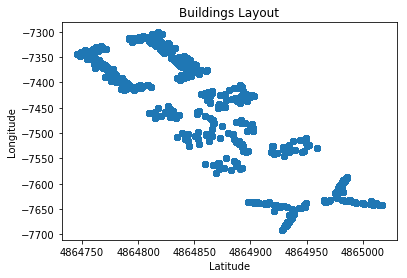

In [8]:
# visual layout of buildings using latitude and longitude
x = rawData['LATITUDE']
y = rawData['LONGITUDE']
plt.scatter(x, y)
plt.title('Buildings Layout')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

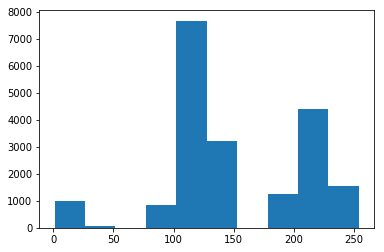

In [9]:
plt.hist(rawData['SPACEID'])
plt.show()

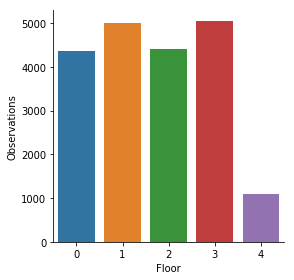

In [10]:
#seaborn
flct=sns.factorplot('FLOOR', data=rawData, kind='count')
flct.set_xlabels('Floor')
flct.set_ylabels('Observations')

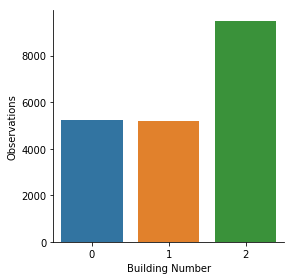

In [11]:
blct=sns.factorplot('BUILDINGID', data=rawData, kind='count')
blct.set_xlabels('Building Number')
blct.set_ylabels('Observations')

In [12]:
# Number of observations in each floor of each building
rawData.groupby(['BUILDINGID','FLOOR'])['FLOOR'].count()

BUILDINGID  FLOOR
0           0        1059
            1        1356
            2        1443
            3        1391
1           0        1368
            1        1484
            2        1396
            3         948
2           0        1942
            1        2162
            2        1577
            3        2709
            4        1102
Name: FLOOR, dtype: int64

In [13]:
rawData.groupby('FLOOR')['FLOOR'].count()

FLOOR
0    4369
1    5002
2    4416
3    5048
4    1102
Name: FLOOR, dtype: int64

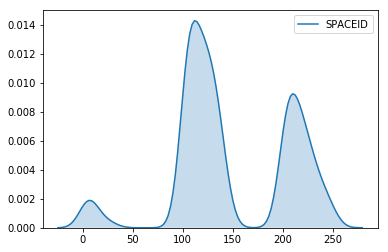

In [14]:
#distribution of SPACEID variable
sns.kdeplot(rawData['SPACEID'], shade=True)

In [15]:
rawData['SPACEID'].unique()

array([106, 103, 102, 122, 105, 101, 112, 104, 110, 108, 109, 111, 107,
        15,  29, 117,  16,  28,  22,  10,   2,   4,   3,   5,   6,   9,
        27,   8,   7,  26,  18, 216,  17, 217, 247, 248, 246, 245, 244,
       243, 242, 241, 240, 201, 202, 204, 203, 205, 207, 206, 209, 211,
       208, 210, 212, 214, 213, 215, 121, 219, 221, 222, 218, 220, 250,
       223, 225, 224, 229, 226, 227, 228, 233, 231, 230, 232, 236, 235,
       234, 237, 238, 239, 141, 140, 143, 113, 114, 116, 115, 120, 118,
       128, 119, 129, 125, 124, 131, 127, 132, 126, 133, 134, 137, 135,
       136, 253, 254, 123, 130, 138, 139, 142, 146, 147, 249, 144,   1,
        30,  25,  13,  12,  11,  14], dtype=int64)

In [16]:
len(rawData['SPACEID'].unique().tolist())

123

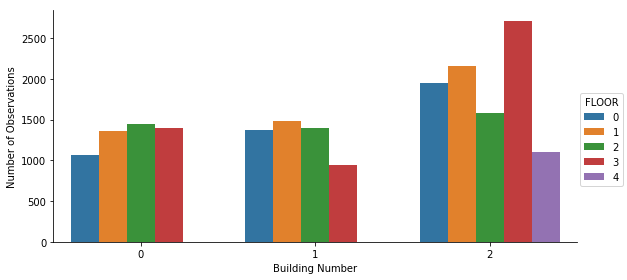

In [17]:
#count by building number and floor
a = sns.factorplot('BUILDINGID', data = rawData, hue = 'FLOOR', kind = 'count', aspect = 2)
a.set_xlabels('Building Number')
a.set_ylabels('Number of Observations')

In [18]:
# Remove features
rawData.drop(['LATITUDE', 'LONGITUDE','RELATIVEPOSITION','USERID','PHONEID', 'TIMESTAMP'], axis = 1, inplace = True)

In [19]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 523 entries, WAP001 to SPACEID
dtypes: int64(523)
memory usage: 79.6 MB


In [20]:
rawData.columns[520:529]

Index(['FLOOR', 'BUILDINGID', 'SPACEID'], dtype='object')

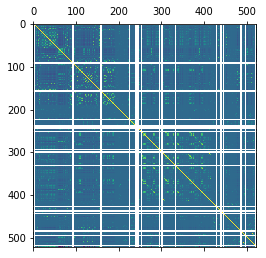

In [21]:
plt.matshow(rawData.corr())

In [22]:
rawData.corr()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID
WAP001,1.000000,-0.000928,NaN,NaN,-0.001348,-0.003762,-0.005184,0.004170,-0.005263,-0.001990,...,-0.002396,0.030199,-0.012692,-0.016281,-0.000999,-0.000369,NaN,-0.025719,0.043761,0.016777
WAP002,-0.000928,1.000000,NaN,NaN,-0.001385,-0.003865,-0.005326,-0.005782,-0.005408,-0.002044,...,-0.002462,-0.001696,-0.013040,-0.016727,-0.001026,-0.000379,NaN,-0.021374,0.044959,-0.035616
WAP003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP005,-0.001348,-0.001385,NaN,NaN,1.000000,-0.005610,-0.007731,-0.008393,-0.007850,-0.002968,...,-0.003574,-0.002463,0.017120,0.044639,-0.001490,-0.000550,NaN,-0.042142,-0.042362,0.008474
WAP006,-0.003762,-0.003865,NaN,NaN,-0.005610,1.000000,-0.021578,-0.023427,-0.021910,-0.008283,...,-0.009976,-0.006873,-0.040328,-0.067774,-0.004158,-0.001535,NaN,0.140161,0.018083,-0.146094
WAP007,-0.005184,-0.005326,NaN,NaN,-0.007731,-0.021578,1.000000,-0.032282,0.103699,-0.011414,...,-0.013747,-0.009471,-0.072806,-0.093393,-0.005730,-0.002115,NaN,0.119614,0.251028,-0.199881
WAP008,0.004170,-0.005782,NaN,NaN,-0.008393,-0.023427,-0.032282,1.000000,-0.032779,-0.012392,...,-0.014925,-0.010283,-0.079044,-0.101394,-0.006221,0.046139,NaN,0.106331,0.089323,0.129147
WAP009,-0.005263,-0.005408,NaN,NaN,-0.007850,-0.021910,0.103699,-0.032779,1.000000,-0.011589,...,-0.013959,-0.009617,-0.073927,-0.094831,-0.005818,-0.002148,NaN,-0.045903,0.254893,-0.209836
WAP010,-0.001990,-0.002044,NaN,NaN,-0.002968,-0.008283,-0.011414,-0.012392,-0.011589,1.000000,...,-0.005277,-0.003636,-0.027947,-0.035849,-0.002200,-0.000812,NaN,-0.003391,0.016908,0.131951


In [23]:
#transform data by assigning +100 to 0 indicating no signal and 1 to 105 for weak to strong signal strength
rawData.iloc[:, 0:520]= np.where(rawData.iloc[:, 0:520] <= 0, rawData.iloc[:, 0:520] + 105, rawData.iloc[:, 0:520] - 100)

In [24]:
# New variable combining Floor and SpaceID
rawData['UID'] = rawData['FLOOR'].astype('str') + '_' + rawData['SPACEID'].astype('str')
rawData.iloc[0:5, 520:]

,FLOOR,BUILDINGID,SPACEID,UID
0,2,1,106,2_106
1,2,1,106,2_106
2,2,1,103,2_103
3,2,1,102,2_102
4,0,0,122,0_122


In [25]:
rawData['UID'] = rawData['UID'].astype("category")

In [26]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 524 entries, WAP001 to UID
dtypes: category(1), int64(523)
memory usage: 79.6 MB


In [27]:
len(rawData['UID'].unique().tolist())

436

In [28]:
#filter and select data for building 2
BLDG2 = rawData[rawData['BUILDINGID'] == 2]
BLDG2.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID,UID
46,0,0,0,0,0,0,0,0,0,0,...,0,0,12,0,0,0,3,2,247,3_247
47,0,0,0,0,0,0,0,0,0,0,...,0,0,16,0,0,0,3,2,248,3_248
49,0,0,0,0,0,0,0,0,0,0,...,0,0,0,14,0,0,3,2,247,3_247
50,0,0,0,0,0,0,0,0,0,0,...,0,0,15,0,0,0,3,2,246,3_246
51,0,0,0,0,0,0,0,0,0,0,...,0,0,13,0,0,0,3,2,245,3_245


In [29]:
BLDG2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9492 entries, 46 to 19933
Columns: 524 entries, WAP001 to UID
dtypes: category(1), int64(523)
memory usage: 38.0 MB


In [30]:
len(BLDG2['UID'].unique().tolist())

317

In [31]:
BLDG2.groupby('UID')['UID'].count()

UID
0_1       0
0_10      0
0_101    30
0_102     0
0_103    57
0_104    80
0_106    30
0_107    40
0_108    38
0_110    30
0_111    39
0_112    40
0_113    18
0_114     0
0_115     0
0_116     0
0_117    42
0_118    47
0_119    40
0_120    40
0_121    60
0_122    70
0_123     0
0_124    78
0_125    40
0_126    50
0_127    78
0_128    60
0_129    50
0_130    50
         ..
4_136    30
4_137    20
4_138    20
4_139    20
4_140    20
4_141    20
4_142    10
4_143    20
4_146    20
4_147    20
4_201    10
4_202    10
4_203    10
4_204    10
4_205    10
4_206    10
4_207    10
4_208    10
4_209    10
4_210    10
4_211    10
4_212    10
4_213    10
4_214    10
4_215    10
4_216    10
4_217    10
4_218    10
4_219    10
4_220     2
Name: UID, Length: 436, dtype: int64

In [32]:
#remove observations with less than 3 samples per class (for cross validation)
BLDG2 = BLDG2.groupby('UID').filter(lambda x : len(x)>3)

In [33]:
BLDG2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9490 entries, 46 to 19933
Columns: 524 entries, WAP001 to UID
dtypes: category(1), int64(523)
memory usage: 38.0 MB


In [34]:
len(BLDG2['UID'].unique().tolist())

316

In [35]:
# Select features from first WAP to last WAP
features = BLDG2.iloc[:,0:520]
print('Summary of Features Sample for All Buildings')
features[0:5]

Summary of Features Sample for All Buildings


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,16,0,0,0
49,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14,0,0
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,0,0,0


In [36]:
# Set dependent variable as SPACEID
depVar = BLDG2['UID']
depVar[0:5]

46    3_247
47    3_248
49    3_247
50    3_246
51    3_245
Name: UID, dtype: category
Categories (436, object): [0_1, 0_10, 0_101, 0_102, ..., 4_217, 4_218, 4_219, 4_220]

In [37]:
features.dtypes

WAP001    int64
WAP002    int64
WAP003    int64
WAP004    int64
WAP005    int64
WAP006    int64
WAP007    int64
WAP008    int64
WAP009    int64
WAP010    int64
WAP011    int64
WAP012    int64
WAP013    int64
WAP014    int64
WAP015    int64
WAP016    int64
WAP017    int64
WAP018    int64
WAP019    int64
WAP020    int64
WAP021    int64
WAP022    int64
WAP023    int64
WAP024    int64
WAP025    int64
WAP026    int64
WAP027    int64
WAP028    int64
WAP029    int64
WAP030    int64
          ...  
WAP491    int64
WAP492    int64
WAP493    int64
WAP494    int64
WAP495    int64
WAP496    int64
WAP497    int64
WAP498    int64
WAP499    int64
WAP500    int64
WAP501    int64
WAP502    int64
WAP503    int64
WAP504    int64
WAP505    int64
WAP506    int64
WAP507    int64
WAP508    int64
WAP509    int64
WAP510    int64
WAP511    int64
WAP512    int64
WAP513    int64
WAP514    int64
WAP515    int64
WAP516    int64
WAP517    int64
WAP518    int64
WAP519    int64
WAP520    int64
Length: 520, dtype: obje

In [38]:
depVar.dtypes

CategoricalDtype(categories=['0_1', '0_10', '0_101', '0_102', '0_103', '0_104', '0_106',
                  '0_107', '0_108', '0_110',
                  ...
                  '4_211', '4_212', '4_213', '4_214', '4_215', '4_216',
                  '4_217', '4_218', '4_219', '4_220'],
                 ordered=False)

In [39]:
BLDG2.tail()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID,UID
19926,0,0,0,0,0,0,0,0,0,0,...,0,0,18,0,0,0,1,2,206,1_206
19927,0,0,0,0,0,0,0,0,0,0,...,0,21,28,0,0,0,1,2,141,1_141
19928,0,0,0,0,0,0,0,0,0,0,...,0,15,18,0,0,0,1,2,207,1_207
19931,0,0,0,0,0,0,0,0,0,0,...,0,0,14,0,0,0,1,2,140,1_140
19933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,140,1_140


# Train/Test Set for 1000 Samples

In [40]:
#test sample of 1000
X_train = (features[:1000])
X_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,16,0,0,0
49,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14,0,0
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,0,0,0


In [41]:
y_train = (depVar[:1000])
y_train.head()

46    3_247
47    3_248
49    3_247
50    3_246
51    3_245
Name: UID, dtype: category
Categories (436, object): [0_1, 0_10, 0_101, 0_102, ..., 4_217, 4_218, 4_219, 4_220]

In [42]:
#cross validation
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = .30, random_state = 0)
X_train.shape, X_test.shape

((700, 520), (300, 520))

In [43]:
# Models
modelRF = RandomForestClassifier()
modelKNN = KNeighborsClassifier()
modelSVC = SVC()
modelGBC = GradientBoostingClassifier()

In [44]:
#fit models
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
modelKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
modelSVC.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
modelGBC.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [48]:
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train, y_train)

[0.67636364 0.70940171 0.76439791]


C:\Users\twkmn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.9971428571428571

In [49]:
print(cross_val_score(modelKNN, X_train, y_train))
modelKNN.score(X_train, y_train)

C:\Users\twkmn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[0.68363636 0.74786325 0.7434555 ]


0.8628571428571429

In [50]:
print(cross_val_score(modelSVC, X_train, y_train))
modelSVC.score(X_train, y_train)

C:\Users\twkmn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[0.37090909 0.43162393 0.51308901]


1.0

In [51]:
print(cross_val_score(modelSVC, X_train, y_train))
modelGBC.score(X_train, y_train)

C:\Users\twkmn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[0.37090909 0.43162393 0.51308901]


0.9957142857142857

In [52]:
# Make Predictions RF
predictions = modelRF.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
predKappa = cohen_kappa_score(y_test, predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.710
Kappa: 0.706


In [53]:
# Make Predictions KNN
predictions = modelKNN.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
predKappa = cohen_kappa_score(y_test, predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.720
Kappa: 0.716


In [54]:
# Make Predictions SVC
predictions = modelSVC.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
predKappa = cohen_kappa_score(y_test, predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.527
Kappa: 0.516


In [55]:
# Make Predictions GBC
predictions = modelGBC.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
predKappa = cohen_kappa_score(y_test, predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.523
Kappa: 0.517


# Train/Test Sets

In [56]:
#Training Set (Feature Space: X Training)
X_train = features
X_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,16,0,0,0
49,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14,0,0
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,0,0,0


In [57]:
#Dependent Variable Training Set (y Training)
y_train = depVar
y_train.head()

46    3_247
47    3_248
49    3_247
50    3_246
51    3_245
Name: UID, dtype: category
Categories (436, object): [0_1, 0_10, 0_101, 0_102, ..., 4_217, 4_218, 4_219, 4_220]

In [58]:
#cross validation
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = .30, random_state = 1)
X_train.shape, X_test.shape

((6643, 520), (2847, 520))

In [59]:
# Models
modelRF = RandomForestClassifier(n_estimators=100)
modelKNN = KNeighborsClassifier(n_neighbors=1, n_jobs=2, metric='manhattan')

In [60]:
print('Summary of feature sample')
features.head()

Summary of feature sample


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,16,0,0,0
49,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14,0,0
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,0,0,0


In [61]:
#dependent variable
depVar[0:5,]

46    3_247
47    3_248
49    3_247
50    3_246
51    3_245
Name: UID, dtype: category
Categories (436, object): [0_1, 0_10, 0_101, 0_102, ..., 4_217, 4_218, 4_219, 4_220]

In [62]:
#fit models
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
modelKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=2, n_neighbors=1, p=2,
           weights='uniform')

In [64]:
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train, y_train)

[0.83513164 0.81986456 0.83893889]


0.9549902152641878

In [65]:
print(cross_val_score(modelKNN, X_train, y_train))
modelKNN.score(X_train, y_train)

[0.80017264 0.80045147 0.80577925]


0.9534848712930905

In [66]:
# Make Predictions RF
predictions = modelRF.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
predKappa = cohen_kappa_score(y_test, predictions)
print(classification_report(y_test, predictions))
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

             precision    recall  f1-score   support

      0_101       1.00      0.80      0.89        10
      0_103       0.90      0.90      0.90        21
      0_104       0.82      0.86      0.84        21
      0_106       0.70      1.00      0.82         7
      0_107       0.91      0.91      0.91        11
      0_108       1.00      0.82      0.90        17
      0_110       1.00      0.69      0.82        13
      0_111       1.00      0.83      0.91        12
      0_112       0.86      1.00      0.92         6
      0_113       1.00      1.00      1.00         7
      0_117       1.00      0.83      0.91        18
      0_118       0.93      1.00      0.97        14
      0_119       0.86      0.80      0.83        15
      0_120       0.89      0.89      0.89         9
      0_121       1.00      1.00      1.00        15
      0_122       0.96      0.96      0.96        23
      0_124       0.96      0.88      0.92        26
      0_125       1.00      1.00      1.00   

C:\Users\twkmn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [67]:
# Make Predictions KNN
predictions = modelKNN.predict(X_test)
predAccuracy = accuracy_score(y_test, predictions)
predKappa = cohen_kappa_score(y_test, predictions)
print(classification_report(y_test, predictions))
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

             precision    recall  f1-score   support

      0_101       0.80      0.80      0.80        10
      0_103       0.80      0.95      0.87        21
      0_104       0.89      0.76      0.82        21
      0_106       0.67      0.86      0.75         7
      0_107       0.91      0.91      0.91        11
      0_108       1.00      0.82      0.90        17
      0_110       0.83      0.77      0.80        13
      0_111       1.00      0.83      0.91        12
      0_112       0.62      0.83      0.71         6
      0_113       1.00      0.86      0.92         7
      0_117       1.00      0.61      0.76        18
      0_118       0.74      1.00      0.85        14
      0_119       1.00      0.73      0.85        15
      0_120       0.67      0.89      0.76         9
      0_121       1.00      0.93      0.97        15
      0_122       0.91      0.91      0.91        23
      0_124       1.00      0.85      0.92        26
      0_125       0.26      0.83      0.40   

C:\Users\twkmn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Neural Network

In [69]:
xnn = features
ynn = depVar
#class values encoded as integers
encoder = LabelEncoder()
encoder.fit(ynn)

LabelEncoder()

In [70]:
list(encoder.classes_)

['0_101',
 '0_103',
 '0_104',
 '0_106',
 '0_107',
 '0_108',
 '0_110',
 '0_111',
 '0_112',
 '0_113',
 '0_117',
 '0_118',
 '0_119',
 '0_120',
 '0_121',
 '0_122',
 '0_124',
 '0_125',
 '0_126',
 '0_127',
 '0_128',
 '0_129',
 '0_130',
 '0_132',
 '0_133',
 '0_134',
 '0_135',
 '0_136',
 '0_137',
 '0_138',
 '0_139',
 '0_140',
 '0_201',
 '0_202',
 '0_203',
 '0_204',
 '0_205',
 '0_206',
 '0_207',
 '0_208',
 '0_209',
 '0_211',
 '0_214',
 '0_215',
 '1_101',
 '1_102',
 '1_103',
 '1_104',
 '1_105',
 '1_106',
 '1_107',
 '1_108',
 '1_109',
 '1_110',
 '1_111',
 '1_112',
 '1_113',
 '1_114',
 '1_115',
 '1_116',
 '1_117',
 '1_118',
 '1_119',
 '1_120',
 '1_121',
 '1_122',
 '1_123',
 '1_124',
 '1_125',
 '1_126',
 '1_127',
 '1_128',
 '1_129',
 '1_130',
 '1_131',
 '1_132',
 '1_133',
 '1_134',
 '1_135',
 '1_136',
 '1_137',
 '1_140',
 '1_141',
 '1_143',
 '1_201',
 '1_202',
 '1_203',
 '1_204',
 '1_205',
 '1_206',
 '1_207',
 '1_209',
 '1_212',
 '1_214',
 '1_215',
 '1_216',
 '1_217',
 '1_218',
 '1_219',
 '1_220',


In [71]:
len(BLDG2['UID'].unique().tolist())

316

In [72]:
encoder.transform(ynn)

array([247, 248, 247, ...,  90,  81,  81], dtype=int64)

In [73]:
list(encoder.inverse_transform([30,30,27,12]))

C:\Users\twkmn\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['0_139', '0_139', '0_136', '0_119']

In [74]:
encoded_Y = encoder.transform(ynn)

In [75]:
dummy_y = keras.utils.to_categorical(encoded_Y, num_classes = 316)

In [76]:
print(dummy_y.shape)

(9490, 316)


In [77]:
#Training Set (Feature Space: X Training)
X_train = xnn
#X_train.head()

In [78]:
#Dependent Variable Training Set (y Training)
y_train = dummy_y

In [79]:
from keras.wrappers.scikit_learn import KerasClassifier

In [80]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(418, input_dim=520, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(316, kernel_initializer='uniform', activation='softmax'))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
    return model

In [81]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=150, batch_size=128, verbose=0)

In [82]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [83]:
results = cross_val_score(estimator, xnn, dummy_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 78.42% (1.52%)
